# **Import Modules**

---



In [50]:
%matplotlib inline

In [57]:
%matplotlib notebook

In [51]:
import pandas as pd
import numpy as np
import matplotlib as plt

print(pd.__version__)
print(np.__version__)
print(plt.__version__)

1.3.5
1.21.6
3.2.2




---


# Pandas 01 | Menyertakan Prefix dan Suffix pada seluruh Kolom Pandas Data Frame

---





### **Persiapan Data Frame**

In [9]:
n_rows = 5
n_cols = 5
cols = tuple('VXYWZ')
cols

('V', 'X', 'Y', 'W', 'Z')

In [10]:
df = pd.DataFrame(np.random.randint(1, 10 , size=(n_rows, n_cols)), columns=cols)
df

,V,X,Y,W,Z
0,4,6,3,3,2
1,1,7,9,6,5
2,6,8,7,2,5
3,7,3,5,7,3
4,3,6,7,5,7


### **Menyertakan Prefix & Suffix Kolom**



*   Menambahkan Prefix atau awalan pada setiap judul kolom
*   Menambahkan Suffix atau akhiran pada setiap judul kolom



In [12]:
df.add_prefix('kolom_')

,kolom_V,kolom_X,kolom_Y,kolom_W,kolom_Z
0,4,6,3,3,2
1,1,7,9,6,5
2,6,8,7,2,5
3,7,3,5,7,3
4,3,6,7,5,7


In [13]:
df.add_suffix('_field')

,V_field,X_field,Y_field,W_field,Z_field
0,4,6,3,3,2
1,1,7,9,6,5
2,6,8,7,2,5
3,7,3,5,7,3
4,3,6,7,5,7




---


# Pandas 02 | Pemilihan Baris (Rows Selection) pada Data Frame

---



### **Persiapan Data Frame**

In [15]:
n_rows = 10
n_cols = 5
cols = tuple('VXYWZ')
cols

('V', 'X', 'Y', 'W', 'Z')

In [17]:
df = pd.DataFrame(np.random.randint(1, 20, size=(n_rows, n_cols)), columns=cols)
df

,V,X,Y,W,Z
0,16,12,17,18,9
1,6,17,6,10,2
2,6,14,18,15,15
3,14,13,2,19,14
4,17,2,19,18,11
5,9,6,4,6,17
6,14,17,6,13,17
7,2,16,5,3,19
8,11,6,12,10,1
9,3,19,15,17,18


### Selection dengan Operator Logika (|)

**|** --> atau 

In [24]:
# Menyeleksi baris bernilai 6 atau 16 pada kolom V
df[(df['V'] == 6) | (df['V'] == 16)]

,V,X,Y,W,Z
0,16,12,17,18,9
1,6,17,6,10,2
2,6,14,18,15,15


### Selection dengan fungsi **isin()**
Fungsi isin() sama saja dengan operator logika |

In [25]:
df[(df['V'].isin([6,16]))]

,V,X,Y,W,Z
0,16,12,17,18,9
1,6,17,6,10,2
2,6,14,18,15,15


### Operator Negasi (~)

Kebalikan dari fungsi isin() dan operator logika |

In [27]:
# Menyeleksi baris yang tidak bernilai 6 atau 16 pada kolom V
df[~df['V'].isin([6,16])]

,V,X,Y,W,Z
3,14,13,2,19,14
4,17,2,19,18,11
5,9,6,4,6,17
6,14,17,6,13,17
7,2,16,5,3,19
8,11,6,12,10,1
9,3,19,15,17,18




---


# Pandas 03 | Konversi tipe data String ke Numerik pada kolom Data Frame


---



### Persiapan Data Frame

Membuat Data Frame dengan key-value, seperti dibawah

In [28]:
data = {'col1' : ['1', '2', '3', 'teks'],
        'col2': ['1', '2', '3', '4']
        }

df = pd.DataFrame(data)
df

,col1,col2
0,1,1
1,2,2
2,3,3
3,teks,4


In [29]:
# Mengecek tipe data dari setiap kolom
df.dtypes

col1    object
col2    object
dtype: object

### Konversi tipe data dengan fungsi **astype()**

In [30]:
# Konversi tipe data col2 menjadi integer
df_x = df.astype({'col2':'int'})
df_x

,col1,col2
0,1,1
1,2,2
2,3,3
3,teks,4


In [32]:
df_x.dtypes

col1    object
col2     int64
dtype: object

### Konversi tipe data numerik dengan fungsi **to_numeric()**

"Memaksa" data yang tidak bisa diubah ke tipe data numerik menjadi bisa dan hasilnya akan menjadi **NaN**

In [33]:
df.apply(pd.to_numeric, errors='coerce')

,col1,col2
0,1.0,1
1,2.0,2
2,3.0,3
3,NaN,4




---


# Pandas 04 | Pemilihan Kolom (Columns Selection) pada Pandas Data


---



### Persiapan Data Frame

In [35]:
n_rows = 5
n_cols = 2
cols = ['bil_pecahan', 'bil_bulat']

df = pd.DataFrame(np.random.randint(1,20, size=(n_rows, n_cols)), columns=cols)
df['bil_pecahan'] = df['bil_pecahan'].astype('float')

df.index = pd.util.testing.makeDateIndex(n_rows, freq='H')
df['teks'] = list('ABCDE')

df

,bil_pecahan,bil_bulat,teks
2000-01-01 00:00:00,14.0,10,A
2000-01-01 01:00:00,10.0,7,B
2000-01-01 02:00:00,13.0,7,C
2000-01-01 03:00:00,15.0,13,D
2000-01-01 04:00:00,11.0,15,E


In [36]:
# Mengecek tipe data dari setiap kolom
df.dtypes

bil_pecahan    float64
bil_bulat        int64
teks            object
dtype: object

### Memilih Kolom Bertipe Data Numerik, Object, Datetime, dan Kombinasi Tipe Data

In [37]:
df.select_dtypes(include='number')

,bil_pecahan,bil_bulat
2000-01-01 00:00:00,14.0,10
2000-01-01 01:00:00,10.0,7
2000-01-01 02:00:00,13.0,7
2000-01-01 03:00:00,15.0,13
2000-01-01 04:00:00,11.0,15


In [38]:
df.select_dtypes(include='int')

,bil_bulat
2000-01-01 00:00:00,10
2000-01-01 01:00:00,7
2000-01-01 02:00:00,7
2000-01-01 03:00:00,13
2000-01-01 04:00:00,15


In [39]:
df.select_dtypes(include='float')

,bil_pecahan
2000-01-01 00:00:00,14.0
2000-01-01 01:00:00,10.0
2000-01-01 02:00:00,13.0
2000-01-01 03:00:00,15.0
2000-01-01 04:00:00,11.0


In [40]:
df.select_dtypes(include='object')

,teks
2000-01-01 00:00:00,A
2000-01-01 01:00:00,B
2000-01-01 02:00:00,C
2000-01-01 03:00:00,D
2000-01-01 04:00:00,E


In [41]:
df.select_dtypes(include='datetime')

""
2000-01-01 00:00:00
2000-01-01 01:00:00
2000-01-01 02:00:00
2000-01-01 03:00:00
2000-01-01 04:00:00


In [42]:
df.select_dtypes(include=['float', 'object'])

,bil_pecahan,teks
2000-01-01 00:00:00,14.0,A
2000-01-01 01:00:00,10.0,B
2000-01-01 02:00:00,13.0,C
2000-01-01 03:00:00,15.0,D
2000-01-01 04:00:00,11.0,E




---


# Matplotlib 01 | Pengenalan Matplotlib | Belajar Matplotlib Dasar


---



## Pengenalan Matplotlib



---


*   Matplotlib adalah salah satu modul dalam Pemrograman Python yang digunakan untuk memvisualisasikan suatu data dalam bentuk grafik
*   Dengan Matplotlib, grafik akan digambarkan pada suatu *figure*, yang di dalamnya terdapat terdiri dari satu atau lebih *axes*



## Komponen Matplotlib Figure
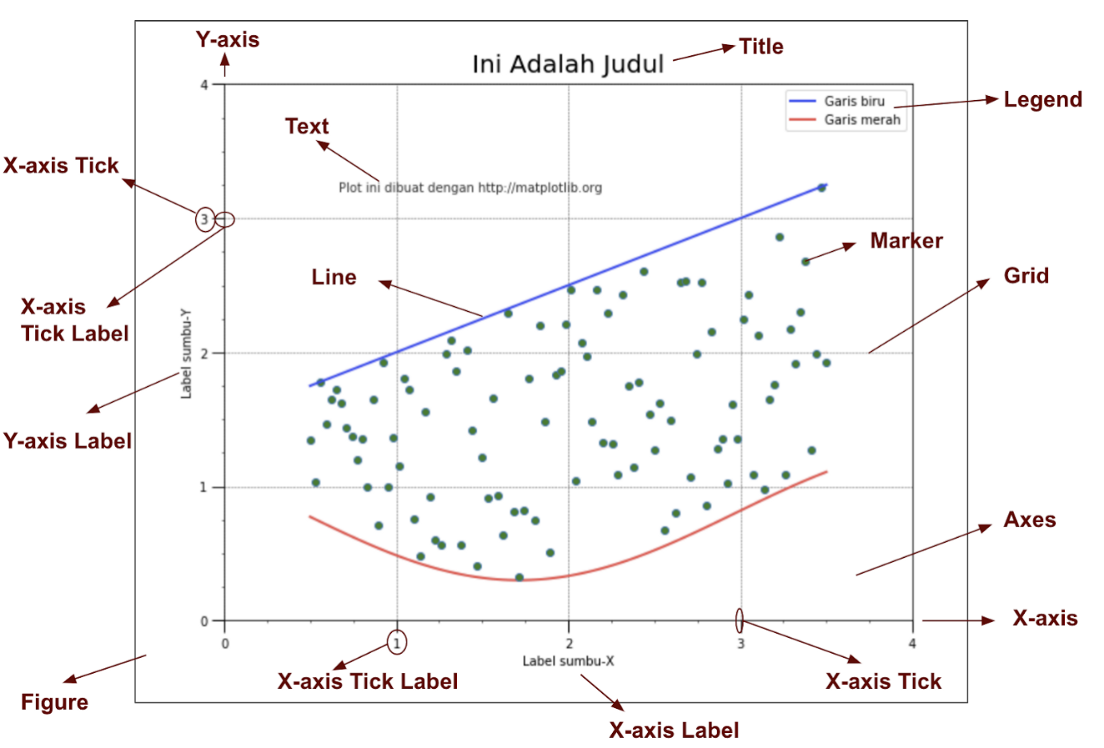

### Cara Membuat Figure dan Axes

In [ ]:
fig = plt.figure() #Figure tanpa axes

In [ ]:
fig, ax = plt.subplots() # Sebuah figure dengan sebuah axes

In [ ]:
fig, axs = plt.subplots(2,3) # Sebuah figure dengan 2x3 grid axes

## Membuat Plotting Sederhana

In [ ]:
import matplotlib as plt

# Persiapan Sample Data
x = [1,2,3,4]
y = [1,4,2,3]

# Cara Pertama
fig, ax = plt.subplots() # Membuat figure dan axes
ax.plot(x,y) # Melakukan plotting

In [ ]:
# Cara Kedua
x = [1,2,3,4]
y = [1,4,2,3]

plt.plot(x,y)

## Object Oriented Style untuk Melakukan Plotting

Secara eksplisit membuat figures dan axes, serta memanggil methods keduanya

In [63]:
x = np.linspace(0,2,100) # Mulai dari 0 sampai 2, total ada 100 data
x

array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494

In [64]:
fig, ax = plt.subplots() #Membuat sebuah figure dan sebuah axes

# Plotting tiga variant data pada axes
ax.plot(x, x, label='linear')
ax.plot(x, x**2, label='quadratic')
ax.plot(x, x**3, label='cubic')

ax.set_xlabel('Sumbu-X') # Menyertakan x-label pada axes
ax.set_ylabel('Sumbu-Y') # Y-label pada axes
ax.set_title('Simple Plot') # Judul
ax.legend() # Menyertakan legend

AttributeError: ignored

## Pyplot Style untuk Melakukan Plotting

Menggunakan **pyplot** untuk membuat dan mengelola figures dan axes, serta menggunakan fungsi pada pyplot untuk melakukan plotting

In [ ]:
x = np.linspace(0,2,100) # Mulai dari 0 sampai 2, total ada 100 data
x

array([0.        , 0.02020202, 0.04040404, 0.06060606, 0.08080808,
       0.1010101 , 0.12121212, 0.14141414, 0.16161616, 0.18181818,
       0.2020202 , 0.22222222, 0.24242424, 0.26262626, 0.28282828,
       0.3030303 , 0.32323232, 0.34343434, 0.36363636, 0.38383838,
       0.4040404 , 0.42424242, 0.44444444, 0.46464646, 0.48484848,
       0.50505051, 0.52525253, 0.54545455, 0.56565657, 0.58585859,
       0.60606061, 0.62626263, 0.64646465, 0.66666667, 0.68686869,
       0.70707071, 0.72727273, 0.74747475, 0.76767677, 0.78787879,
       0.80808081, 0.82828283, 0.84848485, 0.86868687, 0.88888889,
       0.90909091, 0.92929293, 0.94949495, 0.96969697, 0.98989899,
       1.01010101, 1.03030303, 1.05050505, 1.07070707, 1.09090909,
       1.11111111, 1.13131313, 1.15151515, 1.17171717, 1.19191919,
       1.21212121, 1.23232323, 1.25252525, 1.27272727, 1.29292929,
       1.31313131, 1.33333333, 1.35353535, 1.37373737, 1.39393939,
       1.41414141, 1.43434343, 1.45454545, 1.47474747, 1.49494

In [ ]:
# Plotting tiga variant data pada axes
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

plt.xlabel('Sumbu-X') # Menyertakan x-label pada axes
plt.ylabel('Sumbu-Y') # Y-label pada axes
plt.title('Simple Plot') # Judul
plt.legend() # Menyertakan legend